# <div align="center">Practical # 2</div>

# Aim: Solve the s-wave radial Schrodinger equation for screened Coulomb potential

The dimensionless radial Schrodinger equation is:

$$
\frac{d^2 \Psi\left(x\right)}{dx^2} + \left[\epsilon_n - W\left(x\right)\right]\Psi\left(x\right) = 0
$$

where, 

$$
\begin{align}
& x = \frac{r}{a}, \quad \epsilon_n  = \frac{E_n}{E_0}\text{ with, $E_0 =- \frac{(\hbar c)^2}{2(m c^2) a^2}$} (eV), \text{and}\\
%
& W(x) = a^2 U\left(r\right) = \frac{2 m a^2}{\hbar^2} V\left(r\right) = \frac{2 m c^2 a^2}{(\hbar c)^2}\left(\frac{-e^2}{r}\exp\left[-r/a\right]\right) = -\frac{2 a e^2 (m c^2)}{(\hbar c)^2}\frac{\exp\left[-x\right]}{x}
\end{align}
$$


Here, $\epsilon_n$ are the Energy Eigen values for the **screened Coulomb's potential**, $V(r) = -\frac{e^2}{r}\exp[-r/a]$

The **parameters** are given as:

$$
 e = 3.795 (eV A),\; \hbar c = 1973 (eV A), \text{ and } m c^2 = 0.511\times 10^{6}\; (eV)
$$

## We have to solve the Schrodinger equation for $\; a = 3A,\; 5A,\; \text{and } 7A,\;$

The **update equation** for the above Schrodinger equation according to *Numerov's method* is given by:

$$
\Psi_{i+1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i-1}f_{i-1}}{f_{i+1}}
$$

where,

$$
f_i = 1 + \frac{h^2}{12}g_i, \quad g_i = \epsilon_n + \frac{2(m c^2) a e^2}{(\hbar c)^2}\frac{\exp\left[-x_i\right]}{x_i}
$$

**Note**: Here, $h$ is the **step size** along x-axis and not the **Plank's constant**.

We need to do **backward integration** since **forward integration** is unstable. Therefore we rewrite the update equation as:

$$
\begin{align}
&\Psi_{i-1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i+1}f_{i+1}}{f_{i-1}}\\
%
\implies &\Psi_{i} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i+2}f_{i+2}}{f_{i}}\quad\left(\text{Putting, $i = i+1$}\right)\\
\end{align}
$$

For **backward integration**, we need to provide the value of $\Psi_{i+1}$ and $\Psi_{i+2}$ to get $\Psi_i$.

# How to find the bound state Energy Eigen values ?

To find the Energy **Eigen values** we will utilize the boundary conditions:
$$
\begin{equation}
\Psi(0) = 0; \qquad \Psi(\infty) = 0
\end{equation}
$$
The second boundary condition can be implemented by choosing, some large, $r = r_c$ (say) such that, $\Psi(r_c) = 0$. If say, $E_1$ corresponds to a correct energy level, then when we **backward integrate** the radial wavefunction **Numerov’s method**, we should get $\Psi(0) = 0$. A deviation of the energy from $E_1$ will result in $\Psi(0) \ne 0$. The basic procedure to search for correct Energy Eigen value is as follows:

Start wite a guess energy, 
1) The guess energy, $E_1$ should be smaller than the smallest potential energy. In case of **Hyderogen atom**, guess energy should be smaller than $-1$. <br>
2) With the guess energy integrate the equation and get the value of the wavefunction at $r = 0$, which we will denote as $\Psi_1$. Meanwhile, Set another energy, $E_2 = E_1$.<br>
3) Increase the energy $E_2$ by an amount $\delta E$ and get a new energy, $E_2 = E_2 + \delta E$. <br>
4) Integrate the Scrodinger equation to get the corresponding wavefunction, $\Psi_2$ and evaluate $\Psi_2(0)$. <br>
5) Go back to step 2 if $\Psi_1(0)\times \Psi_2(0) >0$. <br>
6) At this step, we should have the correct energy enclosed in the interval, $[E_1, E_2]$. Use root finding method, e.g. **scipy.optimize.brentq** to get the correct energy.

# Libraries

In [35]:
import numpy as np
from scipy.integrate import simps
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Global parameters

In [36]:
e = 3.795
m = 0.511e6
hbar = 1973

# Define a function to calculate $\Psi(0)$ and $\Psi(r)$

In [37]:
def radial_wavefunction_at_0(epsilon, a, x):

    global h

    y = np.zeros(x.size)

    # Boundary condition
    y[-1] = 0.0
    
    # Initialization
    y[-2] = 0.01

    
    # Numerov's algorithm

    g  = epsilon + (2*m*a*e**2*np.exp(-x))/(x*hbar**2)
    f  = 1.0 + (h**2/12)*g

    for i in range(g.size - 3, -1, -1):
        y[i] = (12 - 10*f[i+1]) * y[i+1] - y[i+2] * f[i+2]
        y[i] /= f[i]

    # normalization

    y /= np.sqrt(simps(np.abs(y)**2, x))

    # now extrapolate the wavefunction to u(0)
    # the first derivative equals at ur[0]
    # (u0 - ur[0]) / (0 - r0[0]) = (ur[1] - ur[0]) / (r0[1] - r0[0])
    # y0 = y[0] + (y[1] - y[0]) * (0 - x[0]) / dx

    y0 = y[0]
    
    return y0

def radial_wavefunction(epsilon, x, a):

    global h
    
    y = np.zeros(x.size)

    # Boundary condition
    y[-1] = 0.0
    
    # Initialization
    y[-2] = 0.01

    
    # Numerov's algorithm
    
    g  = epsilon + (2*m*a*e**2*np.exp(-x))/(x*hbar**2)
    f  = 1.0 + (h**2/12)*g

    for i in range(g.size - 3, -1, -1):
        y[i] = (12 - 10*f[i+1]) * y[i+1] - y[i+2] * f[i+2]
        y[i] /= f[i]

    # normalization

    y /= np.sqrt(simps(np.abs(y)**2, x))

    return y

# Display the Energy Eigen value for ground state and first excited state

In [38]:
x = np.linspace(1E-6, 5, 500)

# parameters
h    = x[1] - x[0]

a    = [3,5,7]

Epsilon = np.zeros_like(a)

# Shooting algorithm
######################################################
for i in range(len(a)):
    
    # guess energy
    E_1 = E_2 = -12/(hbar**2/(2*m*a[i]**2))

    # step size for energy
    dE      = 1      

    # wavefunction at r = 0 corresponding to the guess energy
    y1      = radial_wavefunction_at_0(E_1, a[i], x)

    while True:               # "while True" runs infinite number of times untill it encounters a break statement inside it.
        E_2 += dE
        y2 = radial_wavefunction_at_0(E_2, a[i], x)
        if y1 * y2 < 0:       # this means that y1 and y2 have opposite signs.
            break

    Epsilon[i] = brentq(radial_wavefunction_at_0, E_1, E_2, args=(a[i], x))
    print ('ground state energy for a = %d A is E= %5.3f eV' % (a[i], Epsilon[i]*(hbar**2/(2*m*a[i]**2))))


ground state energy for a = 3 A is E= -9.311 eV
ground state energy for a = 5 A is E= -10.817 eV
ground state energy for a = 7 A is E= -11.505 eV


The ground state energies should all be less than -12 ev for $a = 3, 5$, and $7$.

# Find the ground state wavefunction for $a = 3 A, 5 A, 7 A$

In [39]:

# store the wavefunction for different values of n, l
y = [radial_wavefunction(Epsilon[i], x, a[i]) for i in range(3)]


# Plot the ground state wavefunction, $\Psi_g(x)$ for $a = 3 A, 5 A, 7 A$

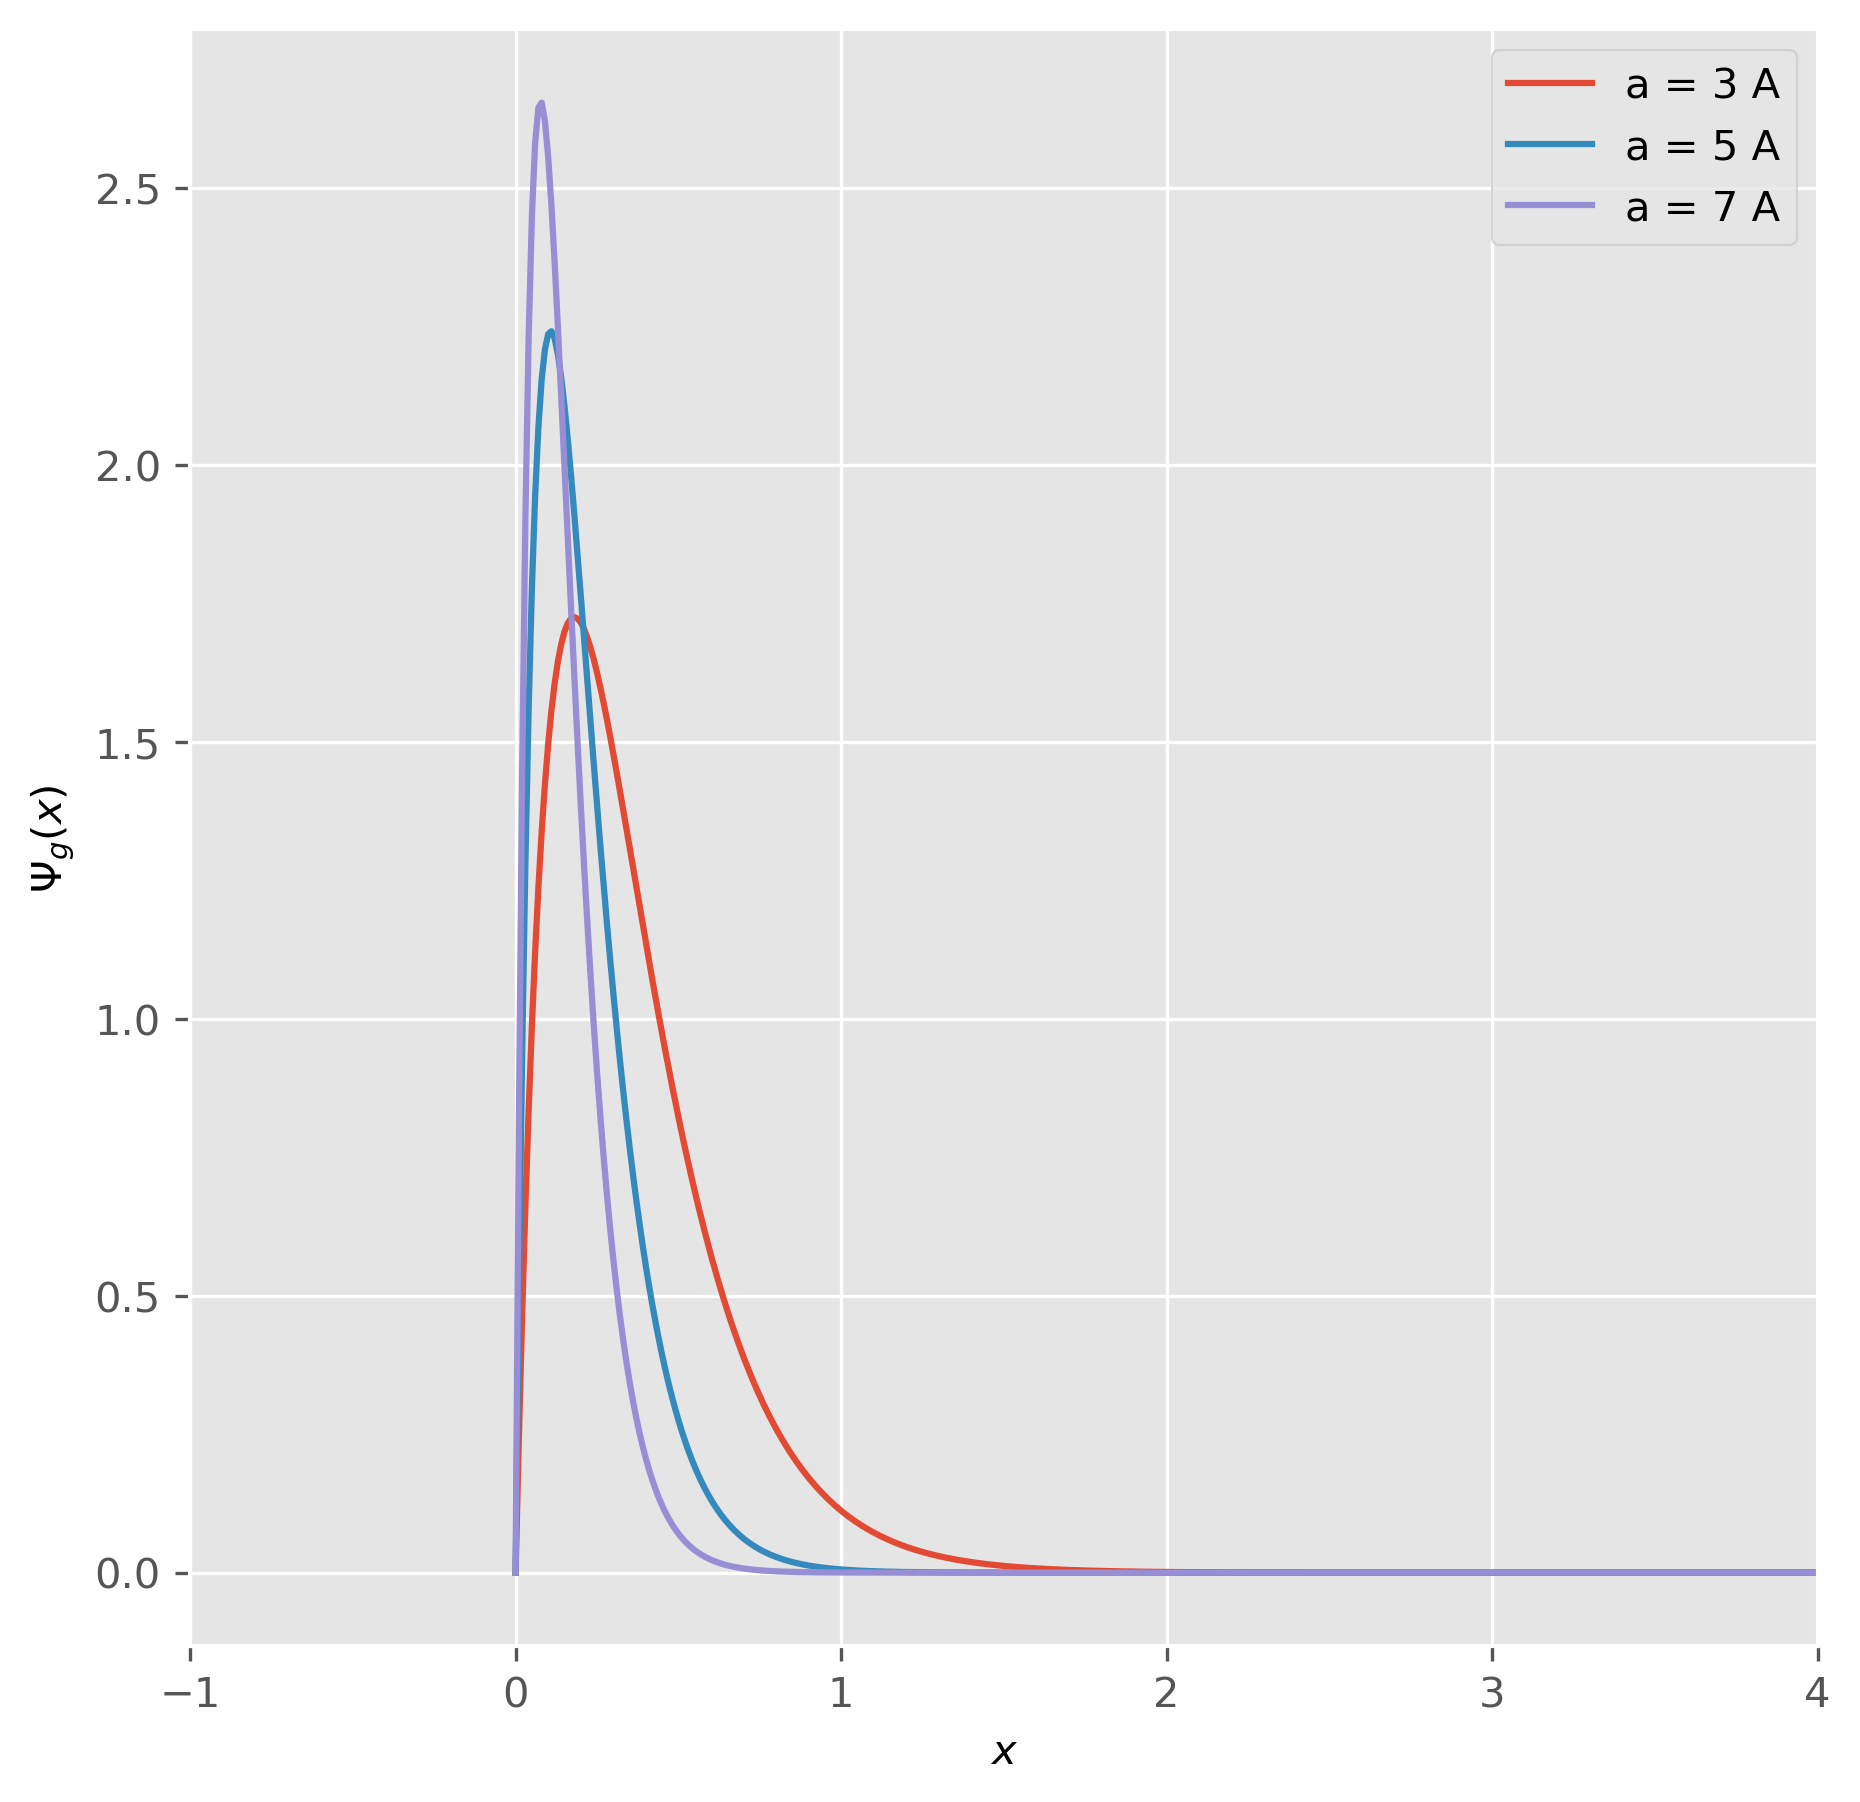

In [40]:

# using the style for the plot
plt.style.use('ggplot')
plt.figure(figsize=(7,7), dpi = 300)
  

for i in range(3):
    plt. plot(x,y[i])

plt.legend(["a = 3 A", "a = 5 A", "a = 7 A"], loc ="upper right")
plt.xlim([-1, 4])
plt.ylabel(r'$\Psi_g(x)$')
plt.xlabel(r'$x$')

# save the plot to file named 'plot.png'
plt.savefig('plots.png')

# Display the plot in this notebook
plt.show()